In [1]:
import pandas as pd
from tqdm.notebook import tqdm
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
scu_df = pd.read_csv("./crawling/data/suncushion_review_final.csv", encoding = "utf-8")

In [3]:
sst_df = pd.read_csv("./crawling/data/sunstick_review_final.csv", encoding = "utf-8")

In [4]:
tqdm.pandas()

scu_df["star"] = scu_df["star"].progress_apply(lambda x: int(x.split(" ")[1][0]))
sst_df["star"] = sst_df["star"].progress_apply(lambda x: int(x.split(" ")[1][0]))

  0%|          | 0/14358 [00:00<?, ?it/s]

  0%|          | 0/25743 [00:00<?, ?it/s]

In [5]:
sst_df = sst_df.drop("title", axis = 1)

In [6]:
sst_df

,page,product_name,star,review,skin_type,brand_name,category
0,1,[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g,5,뽀송하게 마무리돼서 좋아요 근데 너무 발림성이 좋아서 선크림이 발리고 있나 싶긴해요,"['중성', '쿨톤', '블랙헤드', '주름']",AHC,sunstick
1,1,[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g,5,사용하기 엄청 편하고 바른지 안바른지 모를정도라 찐으로 대만족했습니다. 얼굴이랑 바...,[],AHC,sunstick
2,1,[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g,5,선스틱하면 끈적임이 젤 먼저 느껴져서 싫었는데 이건 괜찮아요 잘쓰겠습니다,"['복합성', '가을웜톤', '모공', '미백']",AHC,sunstick
3,1,[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g,5,선스틱 아주 잘쓰는 여름이었어요. 뽀송하고 안 밀리거 양 많고 최고,"['민감성', '웜톤', '각질', '다크서클']",AHC,sunstick
4,1,[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g,5,선크림이 보송해서 좋고 덧바르기 좋아요 선크림 스틱형 몇개는 바르다가 피부 뒤집어졌...,"['복합성', '여름쿨톤', '모공', '민감성']",AHC,sunstick
...,...,...,...,...,...,...,...
25738,2,오브제 오일 컨트롤 선스틱 18g,5,"40대 후반 남자입니다.어느 순간 골프치거나 야외노출을 조금만해도 기미, 주근깨가 ...",[],오브제,sunstick
25739,2,오브제 오일 컨트롤 선스틱 18g,5,너무 좋아서 계속 사서 쓰고 있는 재구매 템 입니다 또 살게요 ㅎㅎ,[],오브제,sunstick
25740,2,오브제 오일 컨트롤 선스틱 18g,5,남자친구 출근할때 사용하라고 사줬는데 만족한다고 하네요 ㅎㅎ,[],오브제,sunstick
25741,2,오브제 오일 컨트롤 선스틱 18g,5,걍 나쁘지않은 느낌 쏘쏘해요 데일리로 바르기 좋은 느낌 걍 그래용,[],오브제,sunstick


In [7]:
scu_df["star"].mean()

4.663253935088452

In [8]:
sst_df["star"].mean()

4.754302140387678

# 썬스틱

In [9]:
sst_c_keywords = ["보냉백", "배스킨"]
sst_p_keywords = ["김고은", "박세리", "더보이즈 큐", "백송민", "안선영", "구성환"]

# '콜라보'라는 단어가 포함된 제품과 포함되지 않은 제품을 나눕니다
sst_c_collabo_df = sst_df[sst_df['product_name'].str.contains("|".join(sst_c_keywords))]
sst_non_c_collabo_df = sst_df[~sst_df['product_name'].str.contains("|".join(sst_c_keywords))]
sst_p_collabo_df = sst_df[sst_df['product_name'].str.contains("|".join(sst_p_keywords))]
sst_non_p_collabo_df = sst_df[~sst_df['product_name'].str.contains("|".join(sst_p_keywords))]
sst_collabo_df = sst_df[sst_df['product_name'].str.contains("|".join(sst_c_keywords + sst_p_keywords))]
sst_non_collabo_df = sst_df[~sst_df['product_name'].str.contains("|".join(sst_c_keywords + sst_p_keywords))]

In [10]:
sst_c = sst_c_collabo_df["star"].mean()

In [11]:
sst_nc = sst_non_c_collabo_df["star"].mean()

In [12]:
sst_p = sst_p_collabo_df["star"].mean()

In [13]:
sst_np = sst_non_p_collabo_df["star"].mean()

In [14]:
sst_collabo = sst_collabo_df["star"].mean()

In [15]:
sst_non_collabo = sst_non_collabo_df["star"].mean()

In [103]:
sst_c, sst_p, sst_non_collabo

(4.705101327742837, 4.841931216931217, 4.737762944983818)

# 그래프

## 캐릭터 / 논 캐릭터

In [86]:
a = ["캐릭터", "캐릭터 아님"]
b = [sst_c, sst_nc]

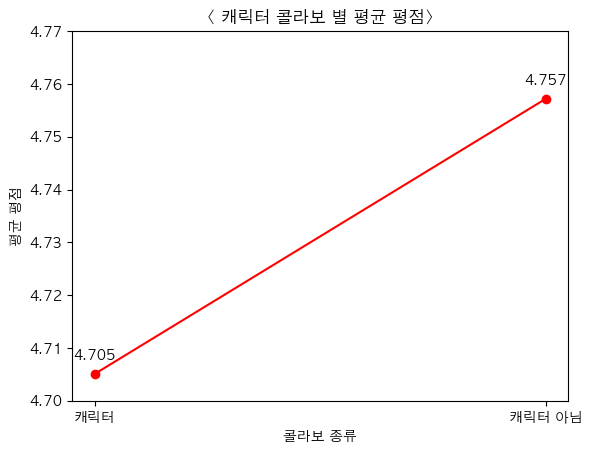

In [92]:
plt.plot(a, b, color = "red", marker='o', linestyle='-')
plt.xlabel("콜라보 종류")
plt.ylabel("평균 평점")
plt.title("< 캐릭터 콜라보 별 평균 평점>")
plt.ylim(4.700, 4.7700)

for i, txt in enumerate(b):
    plt.annotate(f'{txt:.3f}', (a[i], b[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

## 사람 / 논 사람

In [21]:
c = ["사람", "사람 아님"]
d = [sst_p, sst_np]

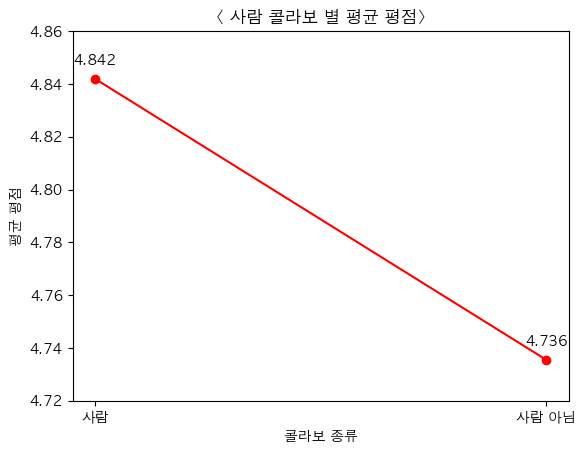

In [93]:
plt.plot(c, d, color = "red", marker='o', linestyle='-')
plt.xlabel("콜라보 종류")
plt.ylabel("평균 평점")
plt.title("< 사람 콜라보 별 평균 평점>")
plt.ylim(4.720, 4.860)

for i, txt in enumerate(d):
    plt.annotate(f'{txt:.3f}', (c[i], d[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

## 콜라보 / 논 콜라보

In [25]:
e = ["콜라보", "콜라보 아님"]
f = [sst_collabo, sst_non_collabo]

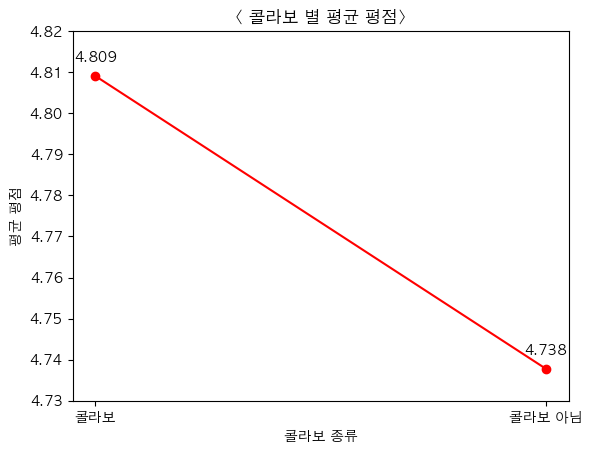

In [95]:
plt.plot(e, f, color = "red", marker='o', linestyle='-')
plt.xlabel("콜라보 종류")
plt.ylabel("평균 평점")
plt.title("< 콜라보 별 평균 평점>")
plt.ylim(4.730, 4.820)

for i, txt in enumerate(f):
    plt.annotate(f'{txt:.3f}', (e[i], f[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

# t-test

## 캐릭터 / 논 캐릭터

In [80]:
# 등분산 검정
sst_c_t = sst_c_collabo_df["star"]
sst_nc_t = sst_non_c_collabo_df["star"]

In [81]:
_,p_value_levene = stats.levene(sst_c_t, sst_nc_t)

if p_value_levene > 0.05:
    print(f"levene_p_value : {p_value_levene}, 등분산 가정 만족")
else:
    print(f"levene_p_value : {p_value_levene}, 이분산 가정 만족")

t, p_value = stats.ttest_ind(
    a = sst_c_t,
    b = sst_nc_t,
    alternative = "two-sided",
    equal_var = False
)

print(f"T-statistics: {t}")
print(f"p-value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

levene_p_value : 0.0018204337286369945, 이분산 가정 만족
T-statistics: -2.8311980013368894
p-value : 0.004696576404569849
귀무가설 기각 : True


## 사람 / 논 사람

In [82]:
# 등분산 검정
sst_p_t = sst_p_collabo_df["star"]
sst_np_t = sst_non_p_collabo_df["star"]

In [83]:
_,p_value_levene = stats.levene(sst_p_t, sst_np_t)

if p_value_levene > 0.05:
    print(f"levene_p_value : {p_value_levene}, 등분산 가정 만족")
else:
    print(f"levene_p_value : {p_value_levene}, 이분산 가정 만족")

t, p_value = stats.ttest_ind(
    a = sst_p_t,
    b = sst_np_t,
    alternative = "two-sided",
    equal_var = False
)

print(f"T-statistics: {t}")
print(f"p-value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

levene_p_value : 3.0785771578551663e-26, 이분산 가정 만족
T-statistics: 12.183504776809189
p-value : 7.694330004412198e-34
귀무가설 기각 : True


## 콜라보 / 논 콜라보

In [84]:
# 등분산 검정
sst_col_t = sst_collabo_df["star"]
sst_ncol_t = sst_non_collabo_df["star"]

In [85]:
_,p_value_levene = stats.levene(sst_col_t, sst_ncol_t)

if p_value_levene > 0.05:
    print(f"levene_p_value : {p_value_levene}, 등분산 가정 만족")
else:
    print(f"levene_p_value : {p_value_levene}, 이분산 가정 만족")

t, p_value = stats.ttest_ind(
    a = sst_col_t,
    b = sst_ncol_t,
    alternative = "two-sided",
    equal_var = False
)

print(f"T-statistics: {t}")
print(f"p-value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

levene_p_value : 3.569993789126149e-15, 이분산 가정 만족
T-statistics: 8.391092761787464
p-value : 5.409694669932273e-17
귀무가설 기각 : True


# 썬쿠션

In [31]:
scu_c_keywords = ["보노보노", "배스킨", "산리오", "오롤리", "배라콜라보"]
scu_p_keywords = ["프롬젤라", "더보이즈 큐", "세븐틴 승관"]

# '콜라보'라는 단어가 포함된 제품과 포함되지 않은 제품을 나눕니다
scu_c_collabo_df = scu_df[scu_df['product_name'].str.contains("|".join(scu_c_keywords))]
scu_non_c_collabo_df = scu_df[~scu_df['product_name'].str.contains("|".join(scu_c_keywords))]
scu_p_collabo_df = scu_df[scu_df['product_name'].str.contains("|".join(scu_p_keywords))]
scu_non_p_collabo_df = scu_df[~scu_df['product_name'].str.contains("|".join(scu_p_keywords))]
scu_collabo_df = scu_df[scu_df['product_name'].str.contains("|".join(scu_c_keywords + scu_p_keywords))]
scu_non_collabo_df = scu_df[~scu_df['product_name'].str.contains("|".join(scu_c_keywords + scu_p_keywords))]

In [32]:
scu_c = scu_c_collabo_df["star"].mean()

In [49]:
scu_c

4.6845784185233725

In [33]:
scu_nc = scu_non_c_collabo_df["star"].mean()

In [34]:
scu_p = scu_p_collabo_df["star"].mean()

In [50]:
scu_p

4.6427184466019416

In [35]:
scu_np = scu_non_p_collabo_df["star"].mean()

In [36]:
scu_col = scu_collabo_df["star"].mean()

In [37]:
scu_ncol = scu_non_collabo_df["star"].mean()

In [51]:
scu_ncol

4.65525197328476

# 그래프

## 캐릭터 / 논 캐릭터

In [38]:
g = ["캐릭터", "캐릭터 아님"]
h = [scu_c, scu_nc]

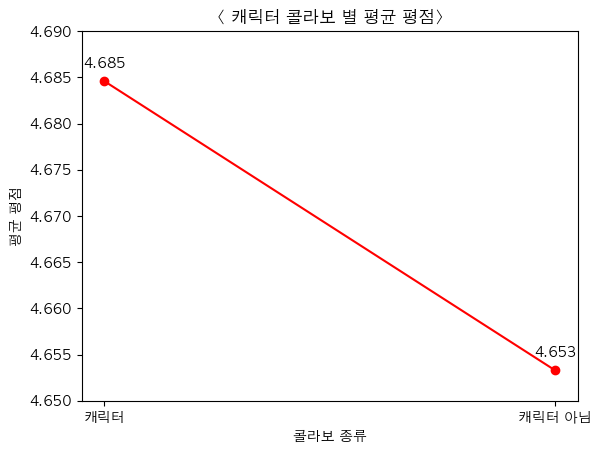

In [96]:
plt.plot(g, h, color = "red", marker='o', linestyle='-')
plt.title("< 캐릭터 콜라보 별 평균 평점>")
plt.xlabel("콜라보 종류")
plt.ylabel("평균 평점")
plt.ylim(4.650, 4.690)

for i, txt in enumerate(h):
    plt.annotate(f'{txt:.3f}', (g[i], h[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

## 사람 / 논 사람

In [41]:
j = ["사람", "사람 아님"]
k = [scu_p, scu_np]

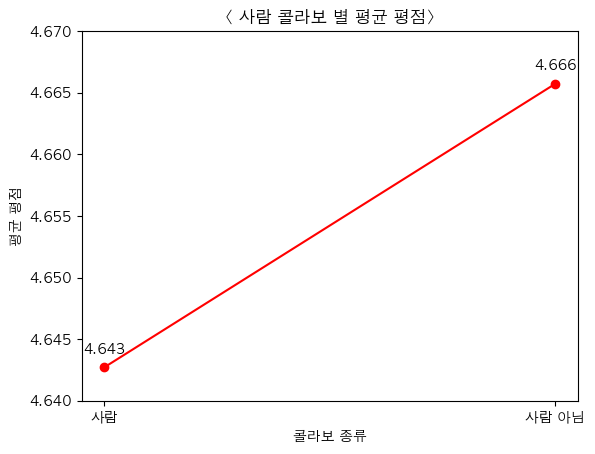

In [97]:
plt.plot(j, k, color = "red", marker='o', linestyle='-')
plt.title("< 사람 콜라보 별 평균 평점>")
plt.xlabel("콜라보 종류")
plt.ylabel("평균 평점")
plt.ylim(4.640, 4.670)

for i, txt in enumerate(k):
    plt.annotate(f'{txt:.3f}', (j[i], k[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

## 콜라보 / 논 콜라보

In [47]:
l = ["콜라보", "콜라보 아님"]
m = [scu_col, scu_ncol]

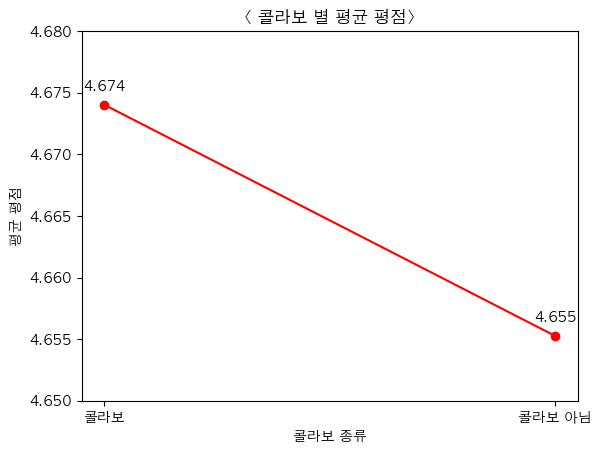

In [102]:
plt.plot(l, m, color = "red", marker='o', linestyle='-')
plt.title("< 콜라보 별 평균 평점>")
plt.xlabel("콜라보 종류")
plt.ylabel("평균 평점")
plt.ylim(4.650, 4.680)

for i, txt in enumerate(m):
    plt.annotate(f'{txt:.3f}', (l[i], m[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

# t-test

$$H_{0}: \mu_{collabo}-\mu_{non}=0$$
$$H_{a}: \mu_{collabo}-\mu_{non}\neq0$$

## 캐릭터 / 논 캐릭터

In [72]:
# 등분산 검정
scu_c_t = scu_c_collabo_df["star"]
scu_nc_t = scu_non_c_collabo_df["star"]

In [75]:
_,p_value_levene = stats.levene(scu_c_t, scu_nc_t)

if p_value_levene > 0.05:
    print(f"levene_p_value : {p_value_levene}, 등분산 가정 만족")
else:
    print(f"levene_p_value : {p_value_levene}, 이분산 가정 만족")

t, p_value = stats.ttest_ind(
    a = scu_c_t,
    b = scu_nc_t,
    alternative = "two-sided",
    equal_var = False
)

print(f"T-statistics: {t}")
print(f"p-value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

levene_p_value : 0.020294252207374876, 이분산 가정 만족
T-statistics: 2.3225199543563977
p-value : 0.02022724148121136
귀무가설 기각 : True


## 사람 / 논 사람

In [76]:
# 등분산 검정
scu_p_t = scu_p_collabo_df["star"]
scu_np_t = scu_non_p_collabo_df["star"]

In [77]:
_,p_value_levene = stats.levene(scu_p_t, scu_np_t)

if p_value_levene > 0.05:
    print(f"levene_p_value : {p_value_levene}, 등분산 가정 만족")
else:
    print(f"levene_p_value : {p_value_levene}, 이분산 가정 만족")    

t, p_value = stats.ttest_ind(
    a = scu_p_t,
    b = scu_np_t,
    alternative = "two-sided",
    equal_var = False
)
print(f"T-statistics: {t}")
print(f"p-value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

levene_p_value : 0.2566825280040223, 등분산 가정 만족
T-statistics: -1.1537824997977837
p-value : 0.2487304807293669
귀무가설 기각 : False


## 콜라보 / 논 콜라보

In [78]:
scu_collabo = scu_collabo_df["star"]
scu_non_collabo = scu_non_collabo_df["star"]

In [79]:
# 등분산 검정

_, p_value_levene = stats.levene(scu_collabo, scu_non_collabo)

if p_value_levene > 0.05:
    print(f"levene_p_value : {p_value_levene}, 등분산 가정 만족")
else:
    print(f"levene_p_value : {p_value_levene}, 이분산 가정 만족")    

t, p_value = stats.ttest_ind(
    a = scu_collabo,
    b = scu_non_collabo,
    alternative = "two-sided",
    equal_var = True
)

print(f"T-statistics: {t}")
print(f"p-value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

levene_p_value : 0.1399092205976372, 등분산 가정 만족
T-statistics: 1.476210887960895
p-value : 0.13990922059780048
귀무가설 기각 : False


# 썬쿠션 그래프 합치기

In [55]:
scu_columns = ["캐릭터와 콜라보", "사람과 콜라보", "콜라보 없음"]
scu_rank = [12.166666666666666, 15.0, 17.82608695652174]
scu_rate = [4.6845784185233725, 4.6427184466019416, 4.65525197328476]
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

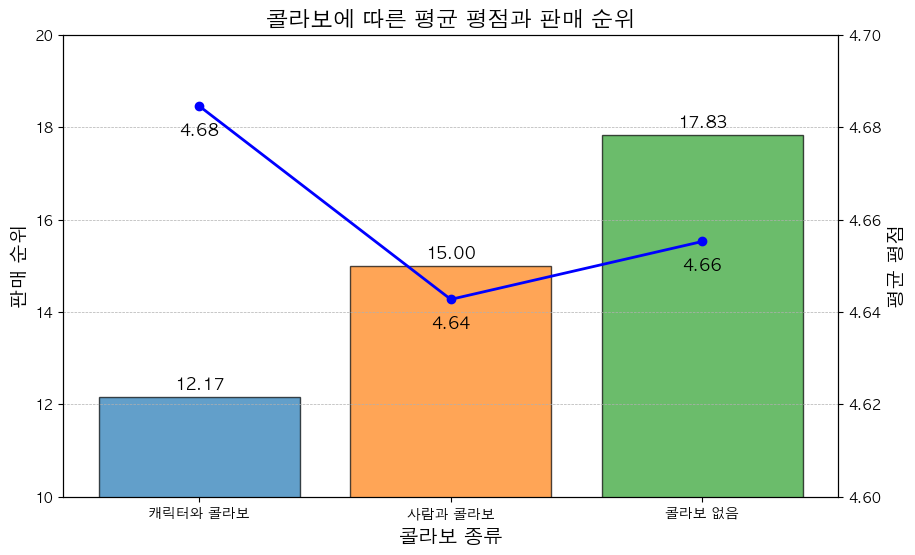

In [70]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for scu_rank with different colors and edge colors
bars = ax1.bar(scu_columns, scu_rank, color=bar_colors, edgecolor='black', alpha=0.7)

# Adding the values on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Create another y-axis for scu_rate with a more vivid color for the line
ax2 = ax1.twinx()
lines = ax2.plot(scu_columns, scu_rate, color='blue', marker='o', linestyle='-', linewidth=2)

# Adding the values on top of each line point
for i, txt in enumerate(scu_rate):
    ax2.text(i, txt - 0.007, f'{txt:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels with a cleaner look
ax1.set_xlabel('콜라보 종류', fontsize=14)
ax1.set_ylabel('판매 순위', fontsize=14, color='black')
ax2.set_ylabel('평균 평점', fontsize=14, color='black')
plt.title('콜라보에 따른 평균 평점과 판매 순위', fontsize=16)

# Adjust y-limits to emphasize differences
ax1.set_ylim(10, 20)
ax2.set_ylim(4.6, 4.7)

# Adjust tick parameters for better aesthetics
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=0)

# Adding grid for better readability
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
ax2.grid(False)

# Show the plot with improved aesthetics
plt.show()


# 썬스틱 그래프 합치기

In [105]:
sst_columns = ["캐릭터와 콜라보", "사람과 콜라보", "콜라보 없음"]
sst_rank = [1.0, 18.714285714285715, 26.1]
sst_rate = [4.705101327742837, 4.841931216931217, 4.737762944983818]
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

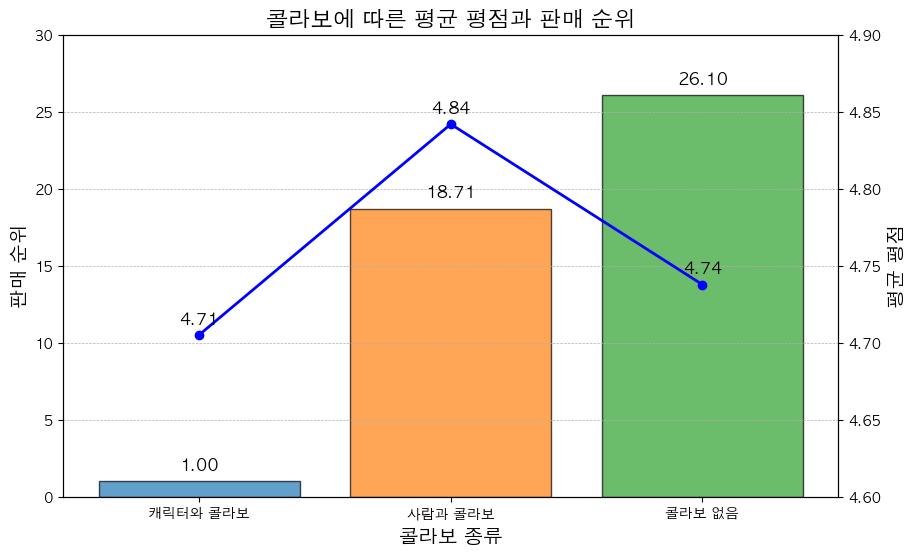

In [114]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for sst_rank with different colors and edge colors
bars = ax1.bar(sst_columns, sst_rank, color=bar_colors, edgecolor='black', alpha=0.7)

# Adding the values on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Create another y-axis for sst_rate with a more vivid color for the line
ax2 = ax1.twinx()
lines = ax2.plot(sst_columns, sst_rate, color='blue', marker='o', linestyle='-', linewidth=2)

# Adding the values on top of each line point
for i, txt in enumerate(sst_rate):
    ax2.text(i, txt + 0.005, f'{txt:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels with a cleaner look
ax1.set_xlabel('콜라보 종류', fontsize=14)
ax1.set_ylabel('판매 순위', fontsize=14, color='black')
ax2.set_ylabel('평균 평점', fontsize=14, color='black')
plt.title('콜라보에 따른 평균 평점과 판매 순위', fontsize=16)

# Adjust y-limits to emphasize differences
ax1.set_ylim(0, 30)
ax2.set_ylim(4.6, 4.9)

# Adjust tick parameters for better aesthetics
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=0)

# Adding grid for better readability
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
ax2.grid(False)

# Show the plot with improved aesthetics
plt.show()